### Settings & imports

In [1]:
%matplotlib notebook

In [2]:
import masserstein 

In [3]:
import os

from masserstein import Spectrum, NMRSpectrum
from masserstein import estimate_proportions

from matplotlib import pyplot as plt

import numpy as np

import pulp

import pickle

import pandas as pd

### Experiment data

In [4]:
components_names = ['Pinene', 'Benzyl benzoate']

In [5]:
protons_list = [16, 12]

### Loading the data

In [6]:
filename = 'preprocessed_mix.csv'
mix = np.loadtxt(filename, delimiter=',')

In [7]:
how_many_components = len(components_names)
names = ['comp' + str(i) for i in range(how_many_components)]

In [8]:
spectra = []
for i in range(how_many_components):
    filename = 'preprocessed_comp' + str(i) + '.csv'
    spectra.append(np.loadtxt(filename, delimiter=','))

In [9]:
spectra2 = []
names = []
for i in range(len(spectra)):
    spectra2.append(NMRSpectrum(confs=list(zip(spectra[i][:,0], spectra[i][:,1])), 
                                protons=protons_list[i]))
    names.append('comp'+str(i))

spectra = spectra2
del(spectra2)
mix = NMRSpectrum(confs=list(zip(mix[:,0], mix[:,1])))

In [10]:
for i, name in enumerate(names):
    globals()[name] = spectra[i]

<IPython.core.display.Javascript object>


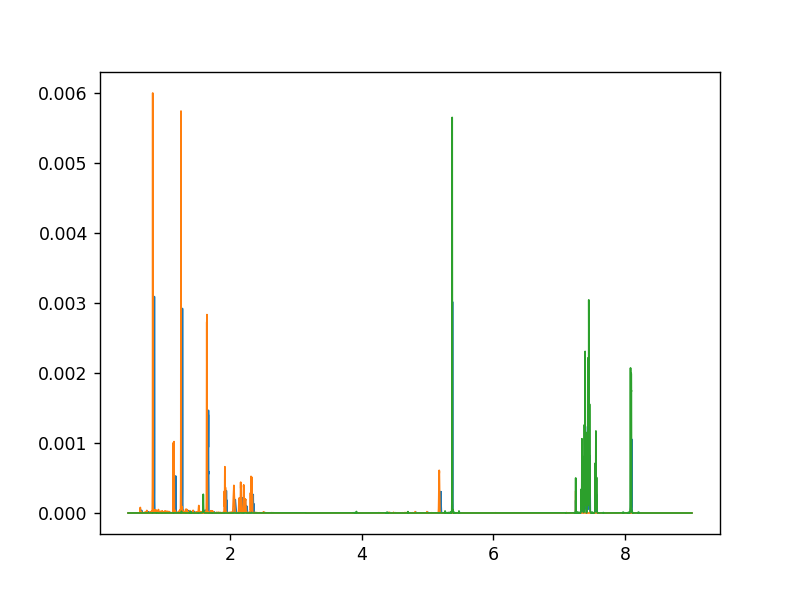

In [11]:
mix.plot(profile=True)
for sp in spectra:
    sp.plot(profile=True)

### Estimation with default parameters

In [12]:
default_MTD = 0.25
default_MTD_th = 0.22

In [13]:
estimation_result = estimate_proportions(mix, spectra,
                                        MTD=default_MTD, 
                                        MTD_th=default_MTD_th,
                                        verbose=True, solver=pulp.GUROBI(msg=False), 
                                        what_to_compare='concentration')

Set parameter Username
Academic license - for non-commercial use only - expires 2023-11-10


Initial filtering of formulas: 100%|██████████████| 2/2 [00:00<00:00, 80.60it/s]


Removed theoretical spectra due to no matching experimental peaks: []
Envelope bounds: [(0.457009, 9.01304, 0), (0.457009, 9.01304, 1)]


Computing chunks: 100%|████████████████████████| 2/2 [00:00<00:00, 23301.69it/s]


Number of chunks: 1
ChunkIDs: [0, 0]
Chunk bounds: [(0.207009, 9.26304)]


Splitting the experimental spectrum into chunks: 70340it [00:00, 2423202.63it/s]


Ion currents in chunks: [0.9999999999999998]


Deconvolving chunks:   0%|                                | 0/1 [00:00<?, ?it/s]

Deconvolving chunk 0


/home/basia/.local/lib/python3.10/site-packages/pulp/pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")
Deconvolving chunks: 100%|████████████████████████| 1/1 [00:55<00:00, 55.95s/it]

Chunk %i deconvolution status: Optimal
Signal proportion in experimental spectrum: 0.997286032762
Noise proportion in experimental spectrum: 0.002713967238
Total explanation: 1.0
Noise proportion in combination of theoretical spectra: 0.009471922476


In [14]:
estimation_result

{'proportions': [0.39307158181939095, 0.6069284181806092],
 'Wasserstein distance': 0.014795729188074841}

Ground truth proportions for this experiment are: 0.3865, 0.6135.

#### Saving results of estimation with default parameters

In [15]:
res_con = pd.DataFrame(np.array(estimation_result['proportions']).reshape(1,-1), 
             columns = components_names)
res_con

,Pinene,Benzyl benzoate
0,0.393072,0.606928


In [16]:
res_con.to_csv('results_concentration_default_parameters.csv')